C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.2417 - loss: 2.5350 - val_accuracy: 0.8106 - val_loss: 0.7046
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.7606 - loss: 0.7218 - val_accuracy: 0.8701 - val_loss: 0.4002
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.8662 - loss: 0.3863 - val_accuracy: 0.9001 - val_loss: 0.3381
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9139 - loss: 0.2449 - val_accuracy: 0.9004 - val_loss: 0.2845
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9355 - loss: 0.1894 - val_accuracy: 0.9051 - val_loss: 0.2883
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9466 - loss: 0.1520 - val_accuracy: 0.9183 - val_loss: 0.2566
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9587 - loss: 0.1180 - val_accuracy: 0.9200 - val_loss: 0.2888
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9634 - loss: 0.1012 - 

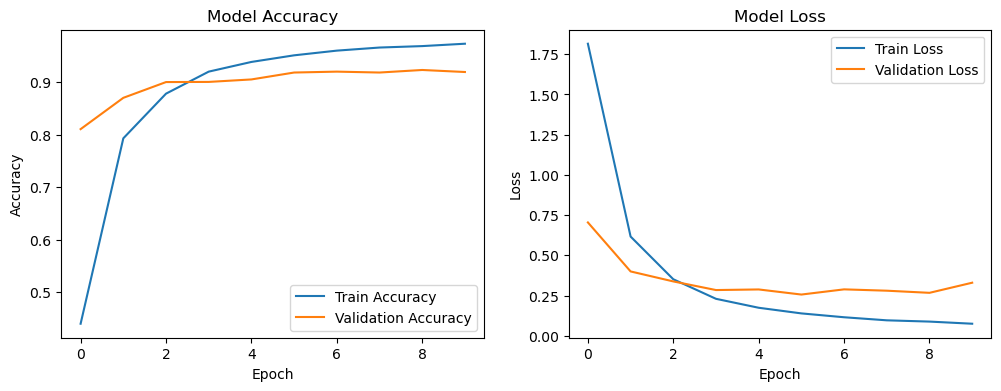

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


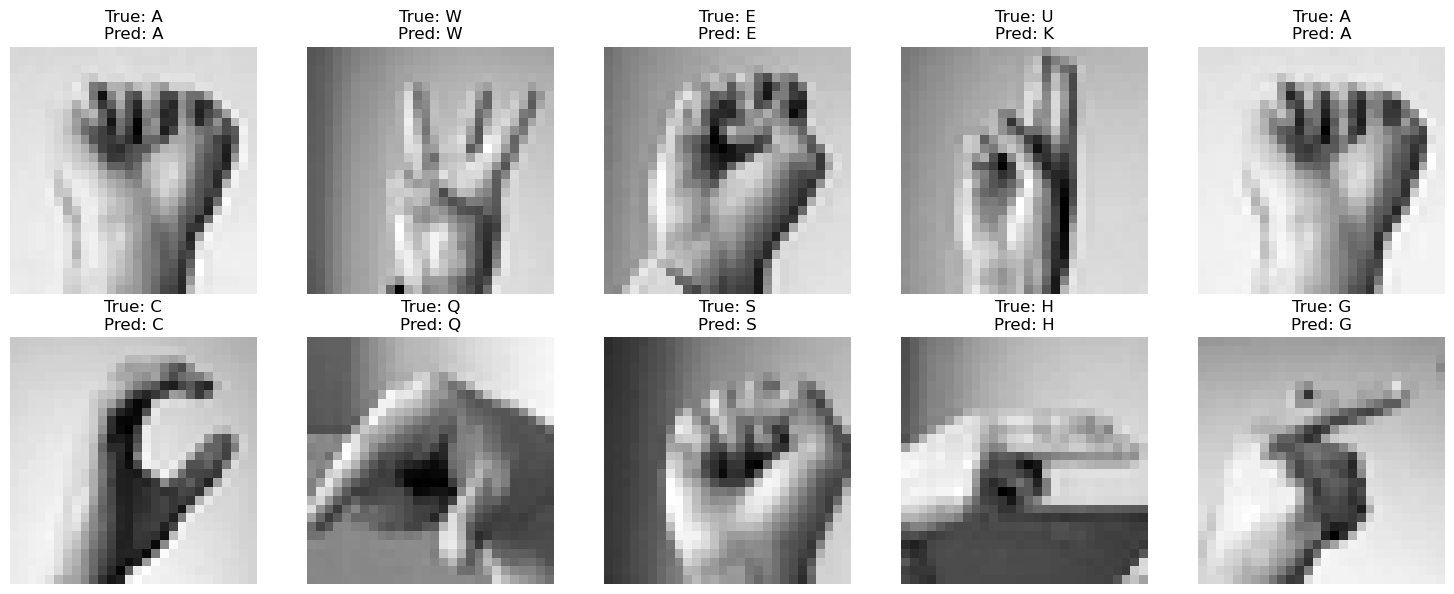

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paths to the dataset
test_path = "Desktop/prodigy/PRODIGY_ML_04/sign_mnist_test/sign_mnist_test.csv"
train_path = "Desktop/prodigy/PRODIGY_ML_04/sign_mnist_train/sign_mnist_train.csv"

# Load the CSV files
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Reduce the dataset size
train_data = train_data.sample(n=27000, random_state=42)
test_data = test_data.sample(n=7000, random_state=42)

# Extract features and labels
y_train = train_data['label'].values
X_train = train_data.drop('label', axis=1).values
y_test = test_data['label'].values
X_test = test_data.drop('label', axis=1).values

# Reshape and normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize pixel values to [0, 1]
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Dynamically determine the number of classes
num_classes = y_train.max() + 1  # Max label value + 1 for zero-based indexing

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# Visualize predictions on test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Map labels to characters (A-Z excluding J and Z)
label_map = {i: chr(65 + i) for i in range(26) if i not in [9, 25]}  # Skip 'J' and 'Z'

# Plot a few examples
num_examples = 10
plt.figure(figsize=(15, 6))
for i in range(num_examples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {label_map[true_labels[i]]}\nPred: {label_map[predicted_labels[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
